In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read in the public art data and examine the head, tail, and shape

In [2]:
art = pd.read_csv('../data/public_art.csv')
art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"


In [3]:
art.tail(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
130,Women Suffrage Memorial,LeQuire,Alan,"600 Charlotte Avenue, Nashville TN",Bronze sculpture,Sculpture,NaN,36.16527,-86.78382,"(36.16527, -86.78382)"
131,Youth Opportunity Center-STARS Nashville - Pea...,Rudloff,Andee,1704 Charlotte Ave.,House paint on vinyl,Mural,NaN,36.15896,-86.79900,"(36.15896, -86.799)"


In [4]:
art.shape

(132, 10)

### Let's explore these additional pandas methods, attributes, and accessors

 - .columns
 - .loc[]
 - [[ ]]
 - .drop()
 - .rename()

#### the `columns` attribute shows the column names for the DataFrame

In [5]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

#### The `loc[ ]` accessor returns the specified rows and columns by their _labels_ 
- you can filter for just some of rows according to specific values
- save the rows where the `Type` is Mural to a new variable `murals` and check the size of this new DataFrame

In [6]:
murals = art.loc[art.Type == 'Mural']
murals.shape

(38, 10)

In [7]:
murals.head(3)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817,"(36.1579, -86.78817)"
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)"
5,Aerial Innovations Mural,Rudloff,Andee,202 South 17th St.,House paint on wood,Mural,NaN,36.17354,-86.73994,"(36.17354, -86.73994)"


#### Passing a list of columns to slice from the DataFrame (double brackets) returns a DataFrame with just those columns

In [8]:
artists = art[['Last Name', 'First Name']]
artists.head(2)

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin


#### Drop columns from a DataFrame with the `.drop( )` method; be sure to specify `columns = ` and pass a list of columns to the method
- remember to assign the DataFrame back to the variable name

In [9]:
art = art.drop(columns = ['Mapped Location'])

In [10]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
art = art.rename(columns = {'Title': 'title', 'Last Name': 'last_name', 
                            'First Name': 'first_name','Location': 'loc', 
                            'Medium': 'medium', 'Description': 'desc'})

In [12]:
art.columns

Index(['title', 'last_name', 'first_name', 'loc', 'medium', 'Type', 'desc',
       'Latitude', 'Longitude'],
      dtype='object')

#### If the column list is short, you can assign new column names (as a list _with every column in the right order_ ) to the columns attribute

In [13]:
art.columns = ['title', 'last', 'first', 'loc', 'med',
              'type', 'desc', 'lat', 'lng']

In [14]:
art.columns

Index(['title', 'last', 'first', 'loc', 'med', 'type', 'desc', 'lat', 'lng'], dtype='object')

### More exploration with pandas
 - .value_counts()
 - .reset_index()
 - .describe()
 - .info()
 - .isnull().sum()

#### Let's remind ourselves of the data 

In [15]:
art.head(2)

,title,last,first,loc,med,type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774


#### `value_counts( )` tallies the number of each value for a column; here we look at the art type column

In [16]:
art.type.value_counts()

Sculpture             61
Mural                 38
Monument              16
Various                2
Frieze                 2
Mosaic                 2
Mobile                 2
Furniture              1
Sculpture/Fountain     1
Stained Glass          1
Multipart              1
Bronzes                1
Fountain               1
Relief                 1
Street Art             1
mural                  1
Name: type, dtype: int64

#### Let's save it into a variable and check the type

In [39]:
type_counts = art.type.value_counts()

In [40]:
type_counts.head()

Sculpture    61
Mural        38
Monument     16
Various       2
Frieze        2
Name: type, dtype: int64

#### check to see what `type_counts` is? Is it a DataFrame?

In [41]:
type(type_counts)

pandas.core.series.Series

#### If you look at the head, you'll notice that the art type is now the index value for the series

In [35]:
type_counts.head(2)

Sculpture    61
Mural        38
Name: type, dtype: int64

#### You can move the index value to a column (converting the series to a DataFrame in the process) with the `reset_index()` method

In [42]:
#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()
type_counts

,index,type
0,Sculpture,61
1,Mural,38
2,Monument,16
3,Various,2
4,Frieze,2
5,Mosaic,2
6,Mobile,2
7,Furniture,1
8,Sculpture/Fountain,1
9,Stained Glass,1


#### Now check the type again and look at the head

In [43]:
print(type(type_counts))
type_counts.head(2)

<class 'pandas.core.frame.DataFrame'>


,index,type
0,Sculpture,61
1,Mural,38


#### Now we can rename the columns to something more reasonable

In [44]:
type_counts.columns = ['art_type', 'count']
type_counts.head(3)

,art_type,count
0,Sculpture,61
1,Mural,38
2,Monument,16


#### the `.info( )` method gets lots of info about the data: 
 - number of rows
 - types for each column
 - size in memory
 - missingness

In [45]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   132 non-null    object 
 1   last    132 non-null    object 
 2   first   122 non-null    object 
 3   loc     131 non-null    object 
 4   med     128 non-null    object 
 5   type    132 non-null    object 
 6   desc    87 non-null     object 
 7   lat     132 non-null    float64
 8   lng     132 non-null    float64
dtypes: float64(2), object(7)
memory usage: 9.4+ KB


#### The `.describe( )` method gives statistical info for the quantitative data 
- count
- mean
- standard deviation
- minimum
- maximum
- quartiles


In [46]:
type_counts.describe()

,count
count,16.000000
mean,8.250000
std,17.043083
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,61.000000


#### You can also check null values by chaining the `isnull( )` and `sum( )` methods together
- this sums up the number of cases where a value is null (the `isnull()` boolean returns a 1 when True and a 0 when False)

In [47]:
art.isnull().sum()

title     0
last      0
first    10
loc       1
med       4
type      0
desc     45
lat       0
lng       0
dtype: int64

### Simplest horizontal barplot using [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#examples-using-matplotlib-pyplot-plot)

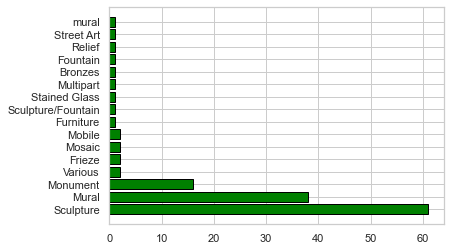

In [52]:
plt.barh('art_type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

### Fancier horizontal barplot with seaborn

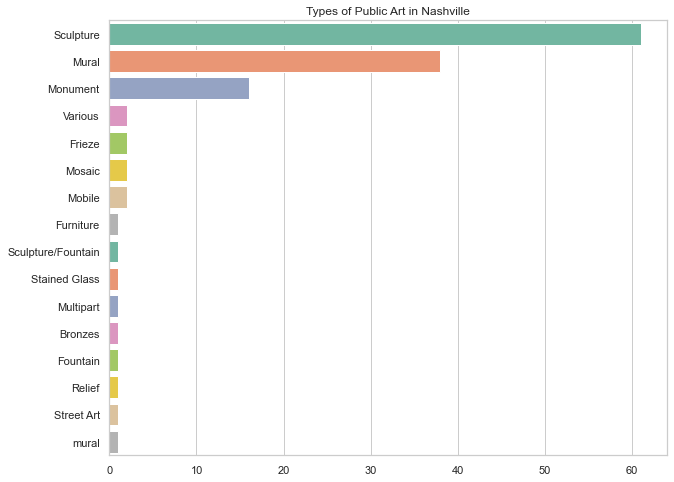

In [49]:
plt.figure(figsize = (10, 8))
sns.set(style="whitegrid")
sns.barplot(x = 'count', y = 'art_type', data = type_counts, palette = 'Set2')
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Public Art in Nashville');